In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

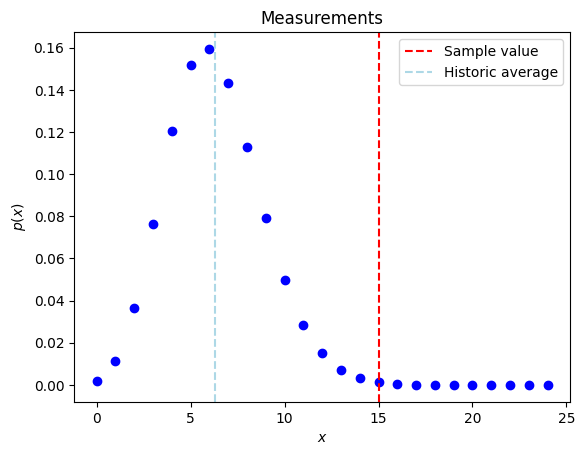

The probability that in a single year are obeserved 15 or more hurricanes is:  0.002217122790073134
The 2005 number of hurricanes is signficantly larger than the other years.


In [132]:
# Set a significance level
significance_level = 0.022

# Poisson distributed hurricanes mu = sigma^2
x0 = 15
mu = 6.3
sigma_mu = np.sqrt(mu)

x = np.arange(25)
y = stats.poisson.pmf(x, mu)

# Plot the measurement distribution
plt.plot(x, y, 'bo')
plt.axvline(x0, linestyle='--', color='red',label='Sample value')
plt.axvline(mu, linestyle='--', color='lightblue',label='Historic average')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()

pxgt14 = 1 - stats.poisson.cdf(x0-1, mu) # P[X >= 15] = P[X > 14] = 1 - P[X <= 14]
print("The probability that in a single year are obeserved 15 or more hurricanes is: ",pxgt14)
print("The 2005 number of hurricanes", "is not" if pxgt14 > significance_level else "is" ,"signficantly larger than the other years.")
# Not statistically significant since pxgt14 < significance_level

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Test statistic: T = -3.786997938137629


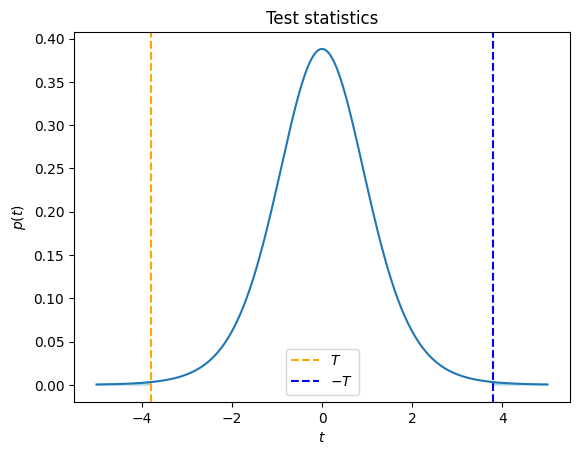

p-value = 0.004302464132864604
The change in blood pressures within our sample is not statistically significant.


In [109]:
# Input data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre) # size of data samples

# Compute the standard deviation (unbiased estimator) and sample means
sigma = np.sqrt((np.var(pre, ddof=1) + np.var(post, ddof=1)) / 2)
xbar1, xbar2 = np.mean(pre), np.mean(post)

# Compute the T score with the test statistics
T = (xbar1 - xbar2) / (sigma * np.sqrt(2 / n))
print("Test statistic: T =", T)

# Plot the test statistics pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange',label='$T$')
plt.axvline(-T, linestyle='--', color='blue',label='$-T$')
plt.title("Test statistics")
plt.ylabel("$p(t)$")
plt.xlabel("$t$")
plt.legend()
plt.show()

# Compute the p-value (double sided)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

# Set a significance level
significance_level = 0.05
print("The change in blood pressures within our sample is", "not" if pvalue < significance_level else "", 
      "statistically significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Text(0.5, 1.0, 'Min temperatures')

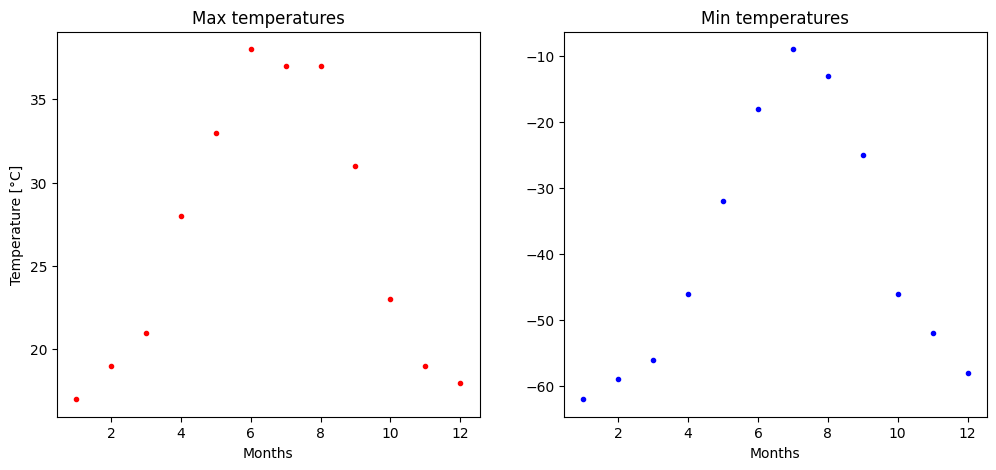

In [156]:
# Input data (Temperatures in °C)
max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
n = len(max)
months = np.arange(1,n+1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].scatter(months, max, marker='.', color='red')
ax[0].set_xlabel("Months")
ax[0].set_ylabel("Temperature [°C]")
ax[0].set_title("Max temperatures")
ax[1].scatter(months, min, marker='.', color='blue')
ax[1].set_xlabel("Months")
ax[1].set_title("Min temperatures")

# TODO: sinusoidal fit

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.